In [2]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

#超参数
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

# 生成训练数据
# torch.unsqueeze()的作用是将一维变成二维，torch只能处理二维数据
x = torch.unsqueeze(torch.linspace(-1,1,1000), dim=1)
# 0.1 * torch.normal(x.size())
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

torch_dataset = Data.TensorDataset(x,y)
#得到一个批量生成器
loader = Data.DataLoader(dataset= torch_dataset, batch_size=BATCH_SIZE,shuffle=True)

In [3]:
class Net(torch.nn.Module):
    #初始化
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1,20)
        self.predict = torch.nn.Linear(20,1)
    #前向传递
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [4]:
net_SGD = Net()
net_Momentum = Net()
net_RMSProp = Net()
net_Adam = Net()

nets = [net_SGD, net_Momentum, net_RMSProp, net_Adam]

opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(),lr=LR, momentum=0.9)
opt_RMSProp = torch.optim.RMSprop(net_RMSProp.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSProp, opt_Adam]

In [5]:
loss_func = torch.nn.MSELoss()
loss_his = [[],[],[],[]]
for epoch in range(EPOCH):
    for step, (batch_x,batch_y) in enumerate(loader):
        for net, opt, l_his in zip(nets, optimizers, loss_his):
            output = net(batch_x) #get output for every net
            loss = loss_func(output, batch_y)
            opt.zero_grad() # clear gradients for next train
            loss.backward() #backpropagation, compute gradients
            opt.step() #apply gradients
            l_his.append(loss.data.numpy()) #losss recoder
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']

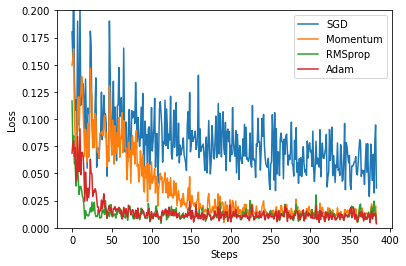

In [6]:
for i, l_his in enumerate(loss_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0,0.2))
plt.show()